In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import arange 
from matplotlib import pyplot 
from pandas import read_csv 
from pandas import set_option 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error

In [2]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.shape

(4177, 9)

In [4]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


as we can see, there are no null values

In [6]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
abalone.rename(columns={'Whole weight':'whole_weight','Shucked weight':'shucked_weight','Viscera weight':'viscera_weight','Shell weight':'shell_weight'}, inplace=True)
abalone.head()

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
abalone['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [11]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
Rings             0
dtype: int64

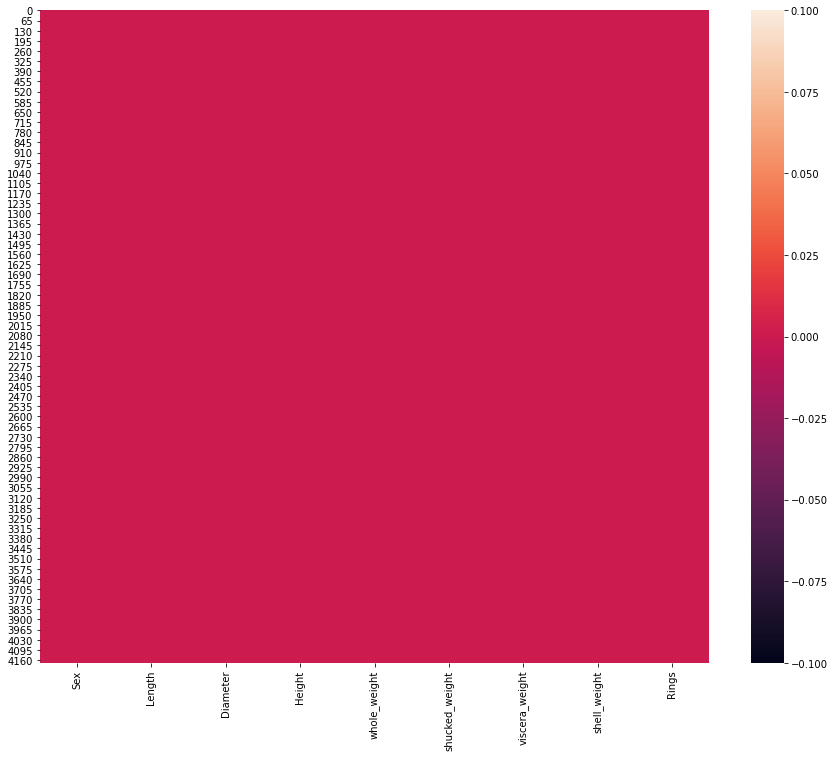

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(abalone.isnull(), cbar=True)
plt.show()

In [13]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Rings'],
      dtype='object')

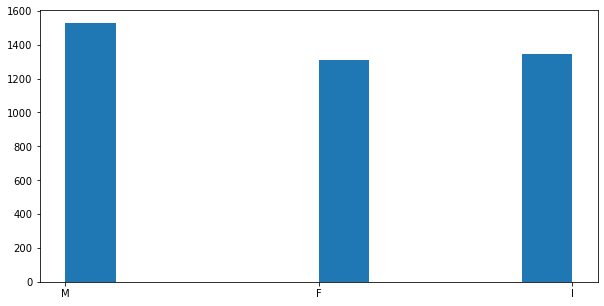

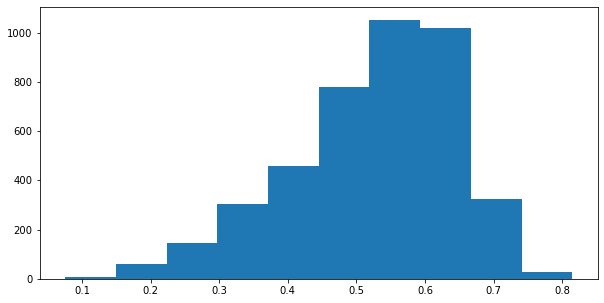

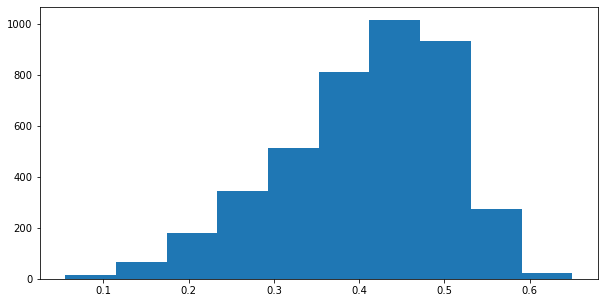

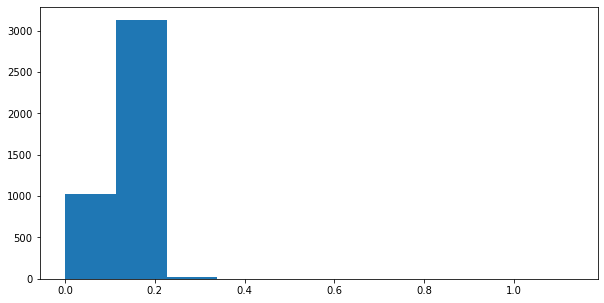

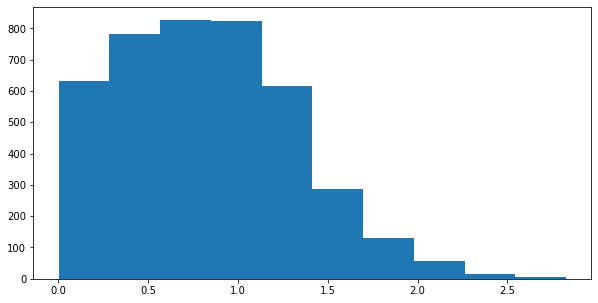

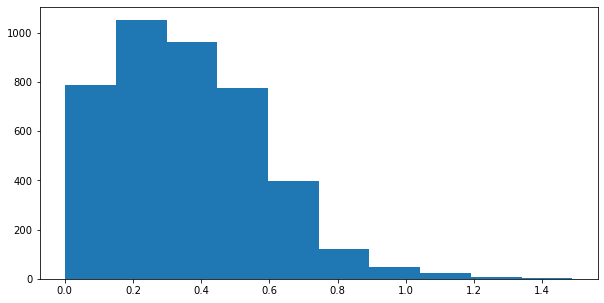

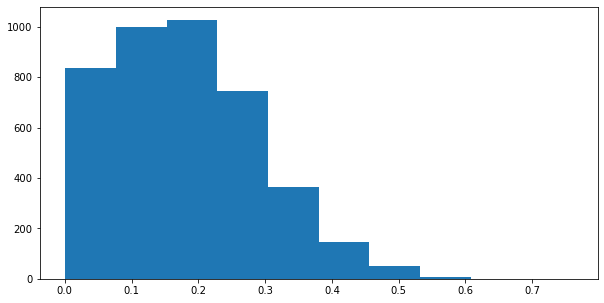

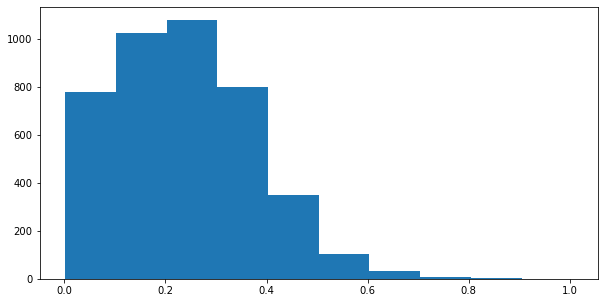

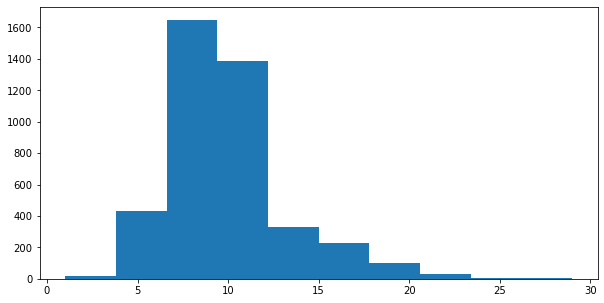

In [14]:
for i in abalone.columns:
    plt.figure(figsize=(10,5))
    plt.hist(abalone[i]);


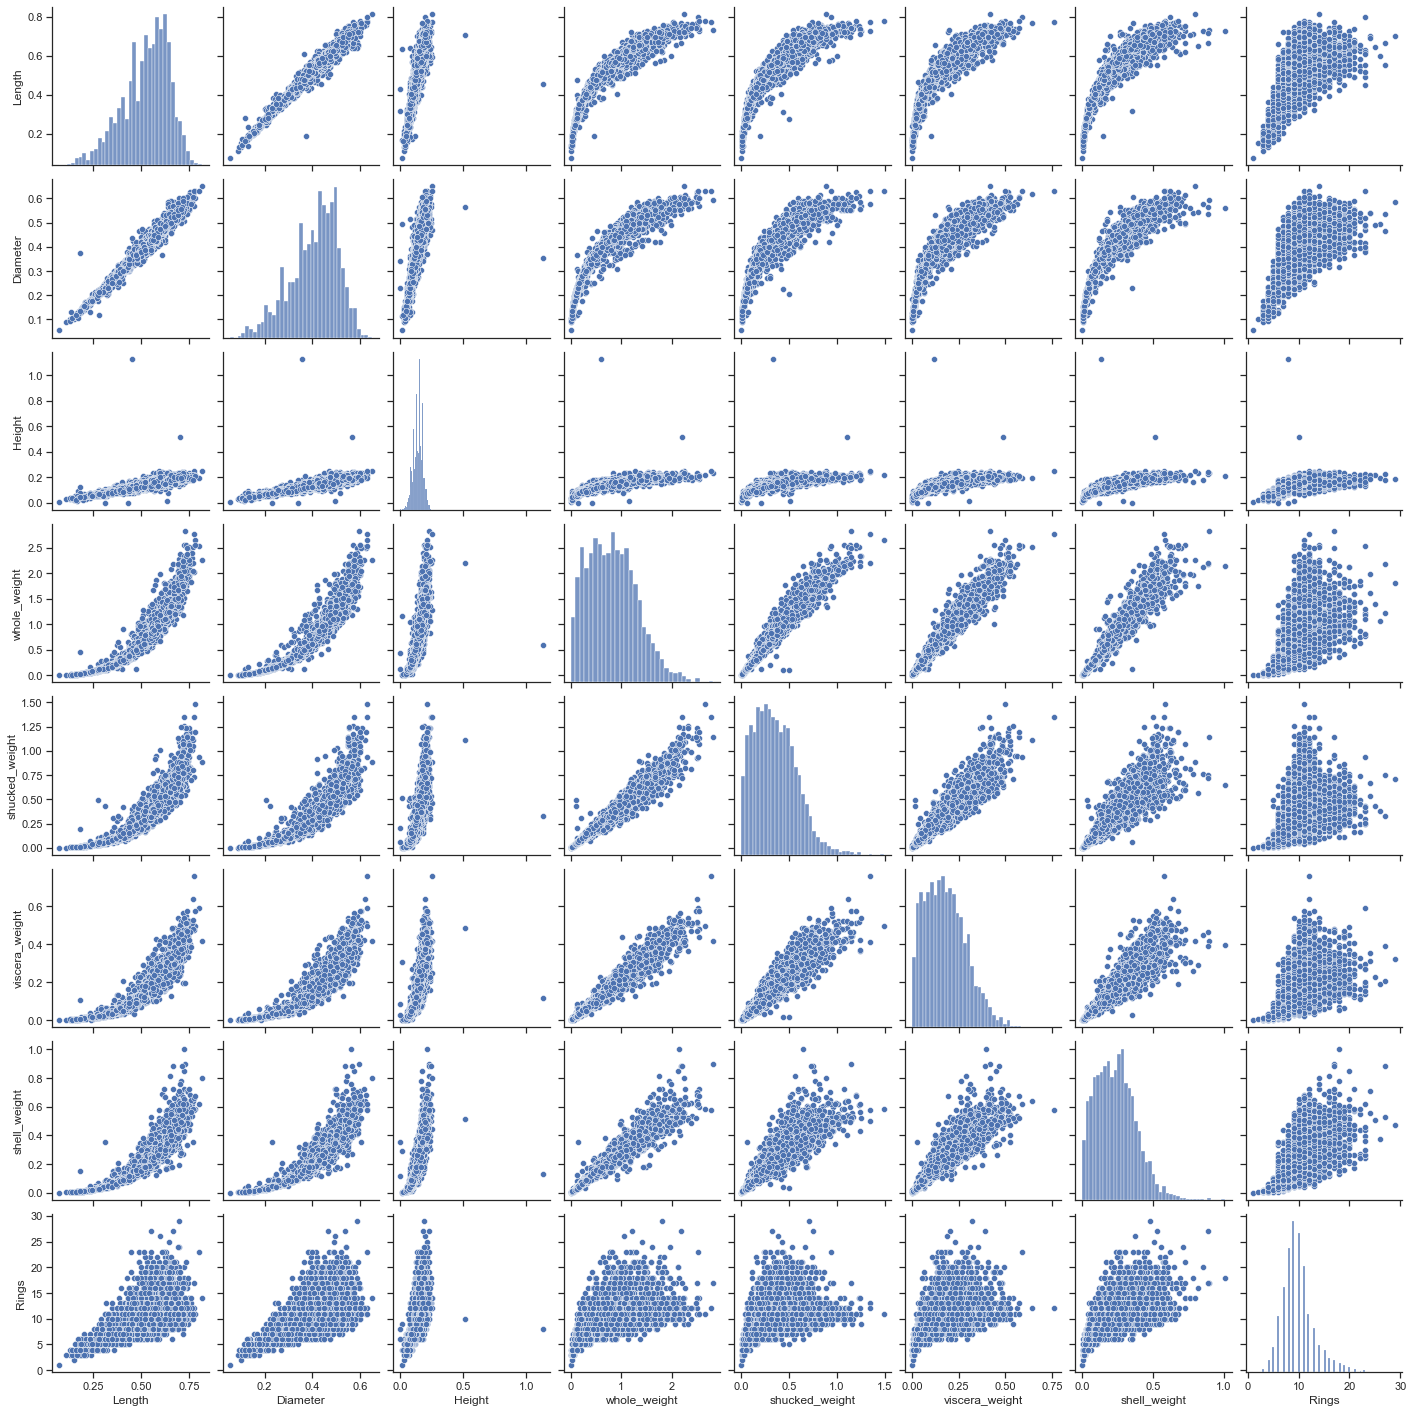

In [15]:
sns.set(style='ticks', color_codes = True, font='sans-serif')
df_pairplot=sns.pairplot(abalone)

In [16]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
Rings               int64
dtype: object

In [17]:
abalone['Sex'] = [ 1 if x == "M" else 0 for x in abalone['Sex']]
abalone.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
Rings               int64
dtype: object

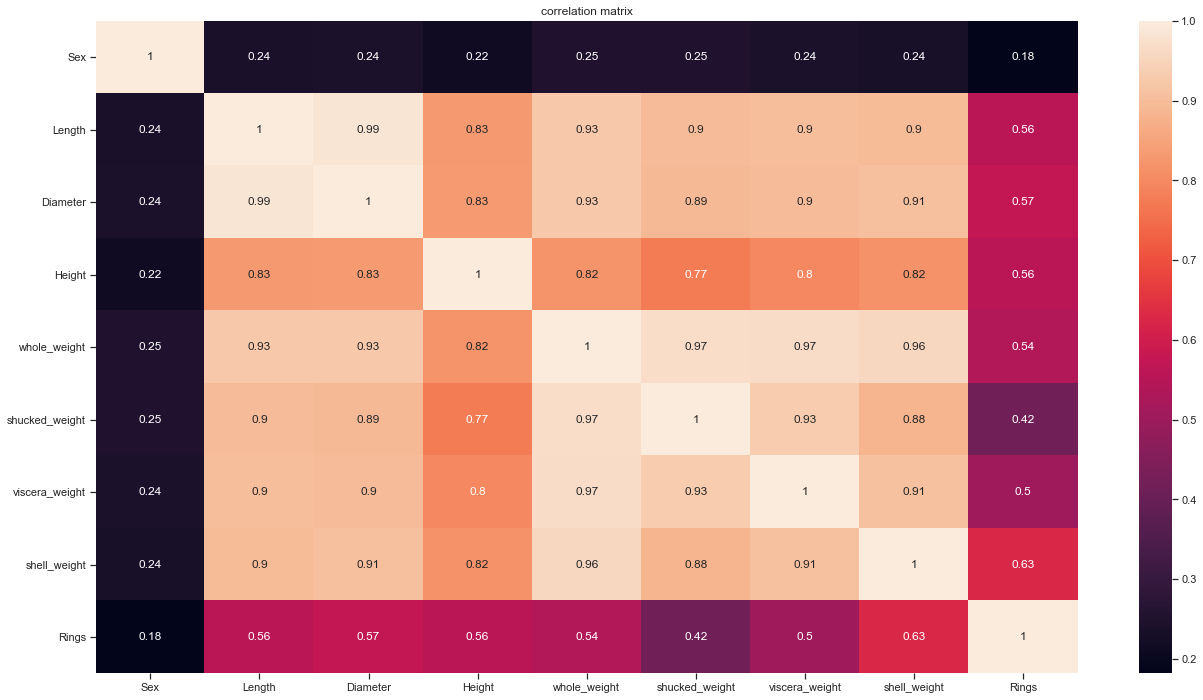

In [18]:
abalone.corr().style.background_gradient(cmap='coolwarm', axis=None)
corr_mat = abalone.corr()
plt.figure(figsize = [22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()

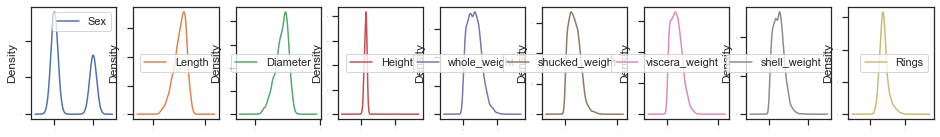

In [19]:
abalone.plot(kind ='density', subplots= True, layout=(5,10), sharex= False, fontsize=1, figsize=(18,12))
plt.show()

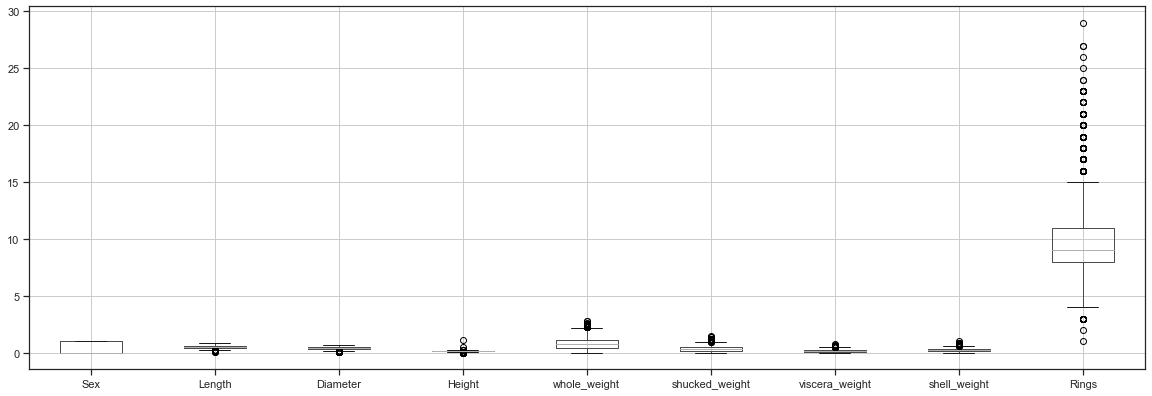

In [20]:
abalone.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [21]:
new_abalone=abalone
new_abalone

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


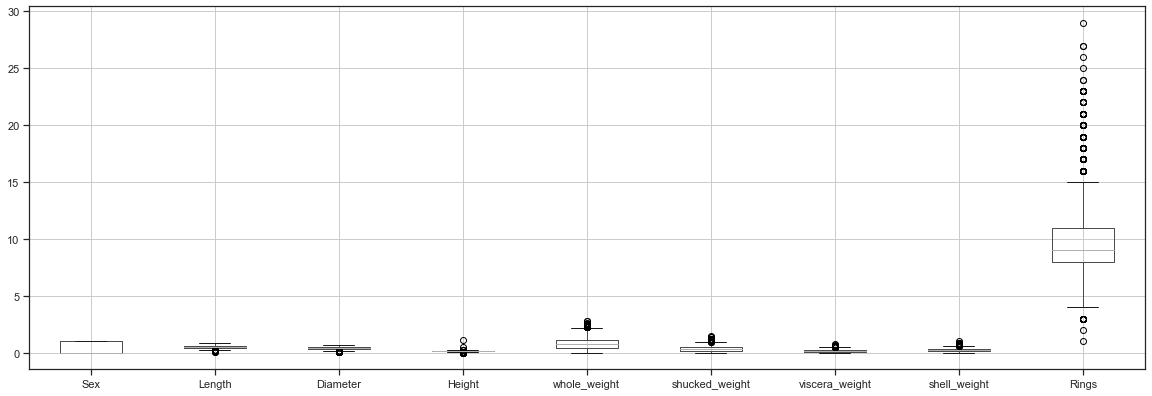

In [22]:
new_abalone.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [23]:
def outliers(new_abalone):
    '''This function is to remove outliers from the data
    Input: dataframe
    Output: outliers treated Dataframe'''
    for i in new_abalone.describe().columns:
        Q1=new_abalone.describe().at['25%',i]
        Q3=new_abalone.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(new_abalone[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(new_abalone[i].median())
            else:
                p.append(j)
        new_abalone[i]=p
    return new_abalone

In [24]:
outliers(new_abalone)

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


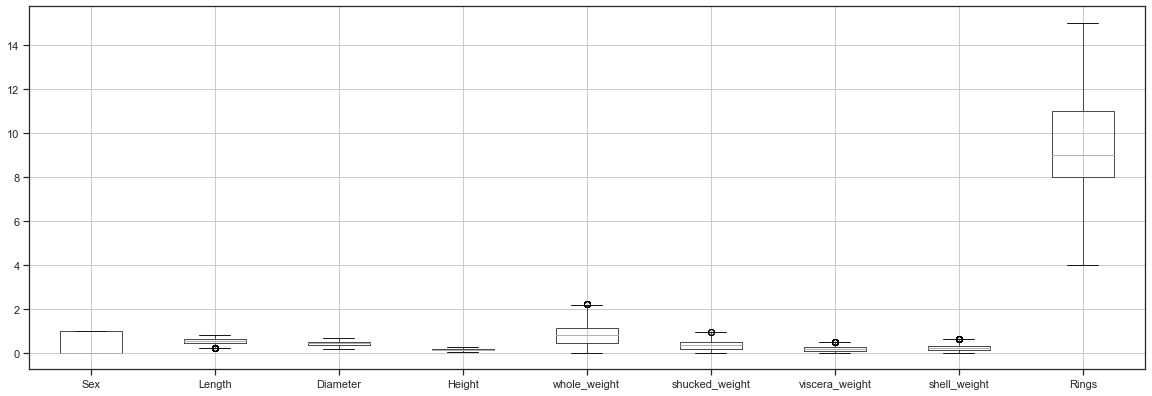

In [25]:
new_abalone.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [26]:
x= abalone.drop('Rings', axis=1)
y=abalone['Rings']


In [27]:
x.shape

(4177, 8)

In [28]:
y.shape

(4177,)

In [29]:
y.value_counts()

9.0     967
10.0    634
8.0     568
11.0    487
7.0     391
12.0    267
6.0     259
13.0    203
14.0    126
5.0     115
15.0    103
4.0      57
Name: Rings, dtype: int64

In [30]:
#abalone['Sex'] = [ 1 if x == "M" else 0 for x in abalone['Sex']]
#abalone.dtypes

In [31]:
abalone

,Sex,Length,Diameter,Height,whole_weight,shucked_weight,viscera_weight,shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [32]:
# Split-out validation dataset
x= abalone.drop('Rings', axis=1)
y=abalone['Rings']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [33]:
X_train.shape,X_validation.shape,Y_train.shape,Y_validation.shape

((3341, 8), (836, 8), (3341,), (836,))

In [34]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: -3.207898 (0.290510)
LASSO: -5.279556 (0.236682)
EN: -5.133207 (0.236286)
KNN: -3.067644 (0.212433)
CART: -5.386042 (0.329219)
SVR: -2.990689 (0.192937)


In [35]:
import numpy
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.857650 using {'n_neighbors': 21}
-5.122889 (0.415033) with: {'n_neighbors': 1}
-3.432430 (0.262586) with: {'n_neighbors': 3}
-3.129993 (0.208736) with: {'n_neighbors': 5}
-3.032639 (0.196008) with: {'n_neighbors': 7}
-2.960060 (0.223676) with: {'n_neighbors': 9}
-2.929949 (0.219818) with: {'n_neighbors': 11}
-2.904081 (0.212354) with: {'n_neighbors': 13}
-2.876014 (0.206134) with: {'n_neighbors': 15}
-2.864658 (0.202082) with: {'n_neighbors': 17}
-2.866937 (0.193726) with: {'n_neighbors': 19}
-2.857650 (0.185292) with: {'n_neighbors': 21}


In [36]:
# Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
# Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [37]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

ScaledAB: -3.230393 (0.279044)
ScaledGBM: -2.788110 (0.187537)
ScaledRF: -2.903185 (0.186582)
ScaledET: -2.911815 (0.188940)


In [38]:
#Tune Ensemble Methods
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.784559 using {'n_estimators': 150}
-2.811065 (0.181156) with: {'n_estimators': 50}
-2.789630 (0.187687) with: {'n_estimators': 100}
-2.784559 (0.190465) with: {'n_estimators': 150}
-2.787050 (0.190231) with: {'n_estimators': 200}
-2.797235 (0.195172) with: {'n_estimators': 250}
-2.821568 (0.198742) with: {'n_estimators': 300}
-2.850787 (0.203738) with: {'n_estimators': 350}
-2.868922 (0.204134) with: {'n_estimators': 400}
